In [19]:
#normalization
acoustic_path = "/Users/yangyang-z/documents/music_data_analysis/acoustic_features/"
weather_path = "/Users/yangyang-z/documents/music_data_analysis/weather factor mean value/"

acoustic_feature_file = ['danceability.xlsx', 'energy.xlsx', 'valence.xlsx', 'tempo.xlsx', 'loudness.xlsx']
weather_factors_file = ['temperature.xlsx', 'humidity.xlsx', 'pressure.xlsx', 'cloudiness.xlsx']

In [22]:
import pandas as pd

def max_val_of_frame(path):
    maxi = -100
    frame = pd.read_excel(path)
    for i in range(len(frame)):
        frame_loc = frame.loc[i].tolist()
        del frame_loc[0]
        if maxi < max(frame_loc):
            maxi = max(frame_loc)
    return maxi

def min_val_of_frame(path):
    mini = 100
    frame = pd.read_excel(path)
    for i in range(len(frame)):
        frame_loc = frame.loc[i].tolist()
        del frame_loc[0]
        if mini > min(frame_loc):
            mini = min(frame_loc)
    return mini

def create_max_dic(acoustic, weather):
    acoustic_max_dict = {}
    acoustic_min_dict = {}
    weather_max_dict = {}
    weather_min_dict = {}
    for p in acoustic:
        path = acoustic_path + p
        maxi = max_val_of_frame(path)
        mini = min_val_of_frame(path)
        acoustic_max_dict[p] = maxi
        acoustic_min_dict[p] = mini
    
    for p in weather:
        path = weather_path + p
        maxi = max_val_of_frame(path)
        mini = min_val_of_frame(path)
        weather_max_dict[p] = maxi
        weather_min_dict[p] = mini
        
    return acoustic_max_dict, acoustic_min_dict, weather_max_dict, weather_min_dict

acoustic_max_dict, acoustic_min_dict, weather_max_dict, weather_min_dict = create_max_dic(acoustic_feature_file, weather_factors_file)


{'danceability.xlsx': 0.11788, 'energy.xlsx': 0.11072, 'valence.xlsx': 0.08039999999999999, 'tempo.xlsx': 20.79952, 'loudness.xlsx': -8.748000000000001}


In [42]:
def normalization(dataframe, minimum, maximum):
    df = dataframe
    for row in range(len(df)):
        r = df.loc[row].tolist()
        for i in range(1, len(r)):
            x_normal = (r[i]-minimum) / (maximum-minimum)
            r[i] = x_normal
        df.loc[row] = r
        print(df)
    return df

In [43]:
def normlization_dataframe(acoustic_max_dict, acoustic_min_dict, weather_max_dict, weather_min_dict):
    for p in acoustic_feature_file:
        path =  acoustic_path + p
        dataframe = pd.read_excel(path)
        maximum = acoustic_max_dict[p]
        minimum = acoustic_min_dict[p]
        df = normalization(dataframe, minimum, maximum)
        df.to_excel(acoustic_path + 'normalization_' + p)
        del df

    for p in weather_factors_file:
        path =  weather_path + p
        dataframe = pd.read_excel(path)
        maximum = weather_max_dict[p]
        minimum = weather_min_dict[p]
        df = normalization(dataframe, minimum, maximum)
        df.to_excel(acoustic_path + 'normalization_' + p)
        del df

In [45]:
#normlization_dataframe(acoustic_max_dict, acoustic_min_dict, weather_max_dict, weather_min_dict)

ValueError: The number of FixedLocator locations (103), usually from a call to set_ticks, does not match the number of ticklabels (141).

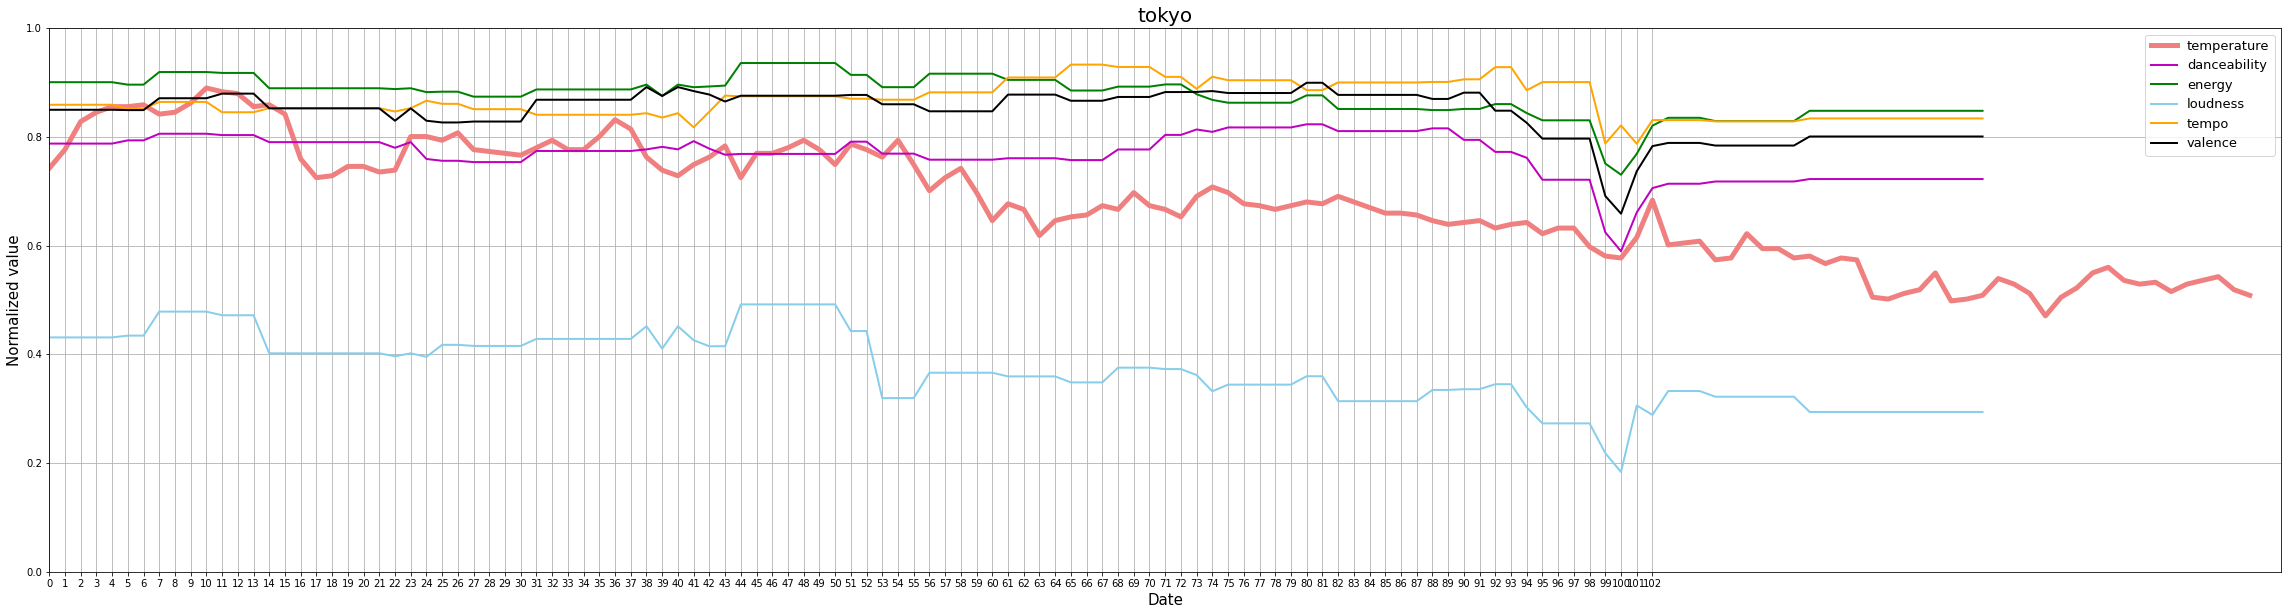

In [268]:
import matplotlib.pyplot as plt

df1 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_temperature.xlsx")
df2 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_danceability.xlsx")
df3 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_energy.xlsx")
df4 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_loudness.xlsx")
df5 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_tempo.xlsx")
df6 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_valence.xlsx")

for i in range(len(df1)):
    row1 = df1.loc[i].tolist()#temperature
    row2 = df2.loc[i].tolist()#danceability
    row3 = df3.loc[i].tolist()#energy
    row4 = df4.loc[i].tolist()#loudness
    row5 = df5.loc[i].tolist()#tempo
    row6 = df6.loc[i].tolist()#valence
    city = row1[1]
    del row1[0]
    del row1[0]
    for i in range(0, 19):
        del row2[0]
        del row3[0]
        del row4[0]
        del row5[0]
        del row6[0]

    plt.figure(figsize=(40,10))
    #plt.rcParams['axes.facecolor'] = 'white'
    plt.grid()
    plt.xlabel('Date', fontsize = 15)
    plt.ylabel('Normalized value', fontsize = 15)
    plt.title(city, fontsize = 20)
    plt.plot(row1, color = 'lightcoral', linewidth = 5, label = 'temperature')
    plt.plot(row2, color = 'm', linewidth = 2, label = 'danceability')
    plt.plot(row3, color = 'green', linewidth = 2, label = 'energy')
    plt.plot(row4, color = 'skyblue', linewidth = 2, label = 'loudness')
    plt.plot(row5, color = 'orange', linewidth = 2, label = 'tempo')
    plt.plot(row6, color = 'black', linewidth = 2, label = 'valence')
    plt.xlim(1, 142)
    plt.ylim(0,1)
    plt.legend(fontsize = 13)
    plt.xticks(x, date)
    plt.xticks(rotation = 290)
    plt.savefig('/Users/yangyang-z/documents/music_data_analysis/visualization/city_poldcharts/'+city+'.jpg')
    #plt.show()

In [186]:
from tslearn.metrics import dtw, dtw_path


In [223]:
df1 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_temperature.xlsx")
df2 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_danceability.xlsx")
df3 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_energy.xlsx")
df4 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_loudness.xlsx")
df5 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_tempo.xlsx")
df6 = pd.read_excel("/Users/yangyang-z/documents/music_data_analysis/visualization/normalization_valence.xlsx")


In [224]:
dtw_t_d = []
dtw_t_e = []
dtw_t_l = []
dtw_t_t = []
dtw_t_v = []
for i in range(len(df1)):
    row1 = df1.loc[i].tolist()#temperature
    row2 = df2.loc[i].tolist()#danceability
    row3 = df3.loc[i].tolist()#energy
    row4 = df4.loc[i].tolist()#loudness
    row5 = df5.loc[i].tolist()#tempo
    row6 = df6.loc[i].tolist()#valence
    for i in range(0, 2):
        del row1[0]
        del row2[0]
        del row3[0]
        del row4[0]
        del row5[0]
        del row6[0]
    dtw_t_d.append(dtw(row1, row2))
    dtw_t_e.append(dtw(row1, row3))
    dtw_t_l.append(dtw(row1, row4))
    dtw_t_t.append(dtw(row1, row5))
    dtw_t_v.append(dtw(row1, row6))


103

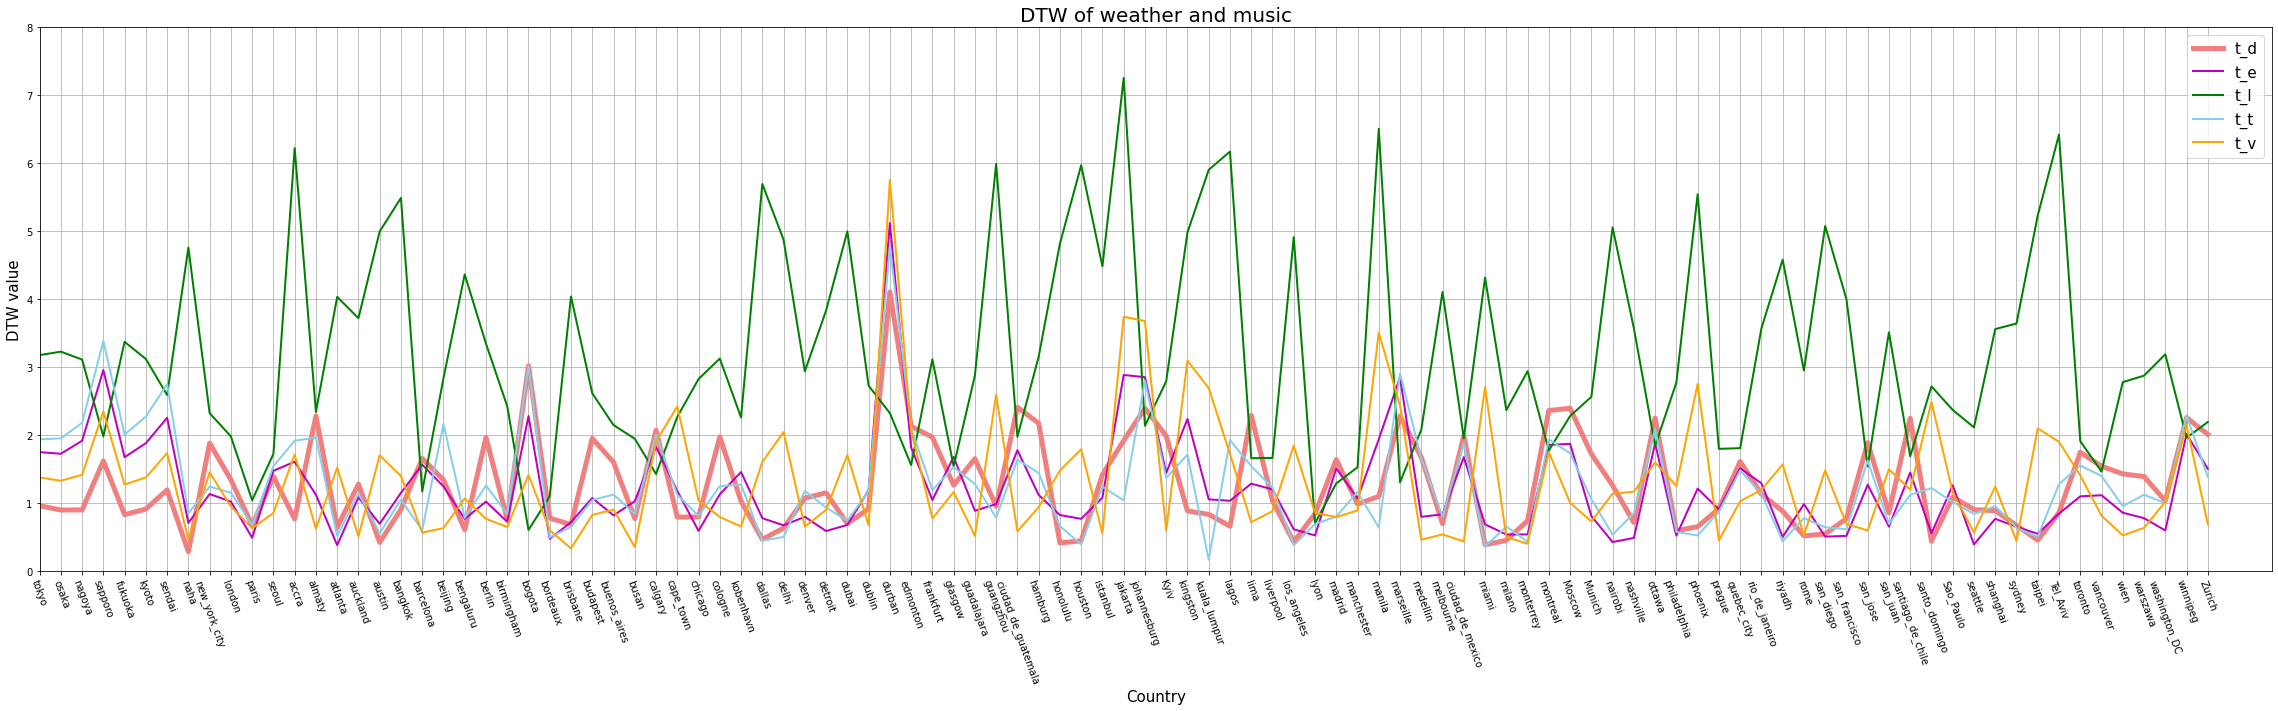

In [271]:
plt.figure(figsize=(40,10))
#plt.rcParams['axes.facecolor'] = 'white'
plt.grid()
plt.xlabel('Country', fontsize = 15)
plt.ylabel('DTW value', fontsize = 15)
plt.title('DTW of weather and music', fontsize = 20)
plt.plot(dtw_t_d, color = 'lightcoral', linewidth = 5, label = 't_d')
plt.plot(dtw_t_e, color = 'm', linewidth = 2, label = 't_e')
plt.plot(dtw_t_l, color = 'green', linewidth = 2, label = 't_l')
plt.plot(dtw_t_t, color = 'skyblue', linewidth = 2, label = 't_t')
plt.plot(dtw_t_v, color = 'orange', linewidth = 2, label = 't_v')

plt.xlim(1, 105)
plt.ylim(0,8)
plt.legend(fontsize = 15)
plt.xticks(x, city_list)
plt.xticks(rotation = 290)
plt.savefig('/Users/yangyang-z/documents/music_data_analysis/visualization/city_poldcharts/dtw.jpg')
plt.show()

In [262]:
city_list = df1.iloc[:,1].tolist()


In [266]:
date = list(df1)
del date[0]
del date[0]
date

['2021-08-16',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-21',
 '2021-08-22',
 '2021-08-23',
 '2021-08-24',
 '2021-08-25',
 '2021-08-26',
 '2021-08-27',
 '2021-08-28',
 '2021-08-29',
 '2021-08-30',
 '2021-08-31',
 '2021-09-01',
 '2021-09-02',
 '2021-09-03',
 '2021-09-04',
 '2021-09-05',
 '2021-09-06',
 '2021-09-09',
 '2021-09-10',
 '2021-09-11',
 '2021-09-12',
 '2021-09-13',
 '2021-09-14',
 '2021-09-15',
 '2021-09-16',
 '2021-09-17',
 '2021-09-18',
 '2021-09-19',
 '2021-09-20',
 '2021-09-21',
 '2021-09-22',
 '2021-09-23',
 '2021-09-24',
 '2021-09-25',
 '2021-09-26',
 '2021-09-27',
 '2021-09-28',
 '2021-09-29',
 '2021-09-30',
 '2021-10-01',
 '2021-10-02',
 '2021-10-03',
 '2021-10-04',
 '2021-10-05',
 '2021-10-06',
 '2021-10-07',
 '2021-10-08',
 '2021-10-09',
 '2021-10-10',
 '2021-10-11',
 '2021-10-12',
 '2021-10-13',
 '2021-10-14',
 '2021-10-15',
 '2021-10-18',
 '2021-10-19',
 '2021-10-20',
 '2021-10-21',
 '2021-10-22',
 '2021-10-23',
 '2021-10-24',
 '2021-10-